# Financial Statements
#### Explanatory Data Analysis

What are the industries that have best 
Is revenue related to employee amount?
Average employee count per industry

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../InvestorsHub - Historical Data/InvestorsHub 30-05-2022 122851 - Webscrape.csv')
df_a = df.copy()

In [3]:
# Add Stock Group
df_a['Stock Group'] = [x.split('/')[-3] for x in df_a['Source Link']]

In [4]:
# new column with telephone area code
def space(x):
    try:
        if str(x)[0] == '+':
            return str(x).split(' ')[0][1:]
    except:
        return 0
df_a['Telephone Area Code'] = [ space(x) for x in df_a['Telephone'] ]

# ----- PRACTICE AREA -----

In [5]:
pd.set_option('display.max_rows', 1000)

In [6]:
df_a['Telephone Area Code'].value_counts().sort_values()

                    1
511                 1
972-9-8921111       1
1242                1
962                 1
787                 1
1-410-480-808       1
1646                1
85                  1
48                  1
90                  1
358                 1
506                 1
121                 1
853                 1
675                 1
561                 1
356                 2
51                  2
976                 2
62                  2
264                 2
56                  3
34                  3
598                 3
507                 3
81                  4
32                  4
7                   5
57                  5
82                  5
46                  5
45                  5
357                 5
377                 6
1441                6
971                 7
91                  8
441                 8
39                  8
886                 8
33                 10
54                 10
60                 12
1345               13
52        

In [7]:
import requests
from bs4 import BeautifulSoup

In [8]:
response = requests.get("https://countrycode.org/")

In [9]:
soup = BeautifulSoup(response.text, 'html.parser')

In [10]:
ls = [x.get_text() for x in soup.select('td')][:240*6]

In [11]:
data = {
'country' :ls[0::6],
'country_code' : ls[1::6],
'ISO_codes' : ls[2::6],
'Population' : ls[3::6],
'Area_KM2' : ls[4::6],
'GDP_USD' : ls[5::6]
}

In [12]:
df = pd.DataFrame(data)

In [13]:
df_1 = df.copy()

In [14]:
df_2 = df_1[['country','country_code']].copy()

In [15]:
df_b = df_a[['Company Name','Telephone Area Code']].copy()

In [16]:
print(
    "dfa: ", df_b.shape, "\n"
    "df2: ", df_2.shape
)

dfa:  (10491, 2) 
df2:  (240, 2)


In [17]:
df_b.head(10)

,Company Name,Telephone Area Code
0,A-Mark Precious Metals Inc.,1
1,A SPAC I Acquisition Corp.,65
2,A SPAC I Acquisition Corp. Unit,65
3,A SPAC II Acquisition Corp. Unit,65
4,A. Schulman Inc.,1
5,A2Z Smart Technologies Cor,1
6,AAON Inc.,1
7,ABG Acquisition Corp. I,1
8,ABIOMED Inc.,1
9,Abri SPAC I Inc.,1


In [18]:
df_2.head(10)

,country,country_code
0,Afghanistan,93
1,Albania,355
2,Algeria,213
3,American Samoa,1-684
4,Andorra,376
5,Angola,244
6,Anguilla,1-264
7,Antarctica,672
8,Antigua and Barbuda,1-268
9,Argentina,54


In [22]:
df_b2 = df_b.merge(df_2, left_on="Telephone Area Code", right_on="country_code")

<AxesSubplot:>

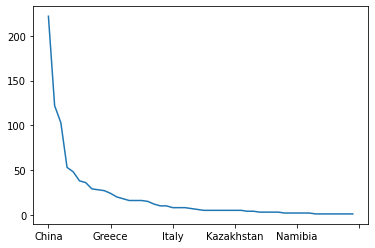

In [37]:
df_b2[(df_b2['country'] != 'United States') & (df_b2['country'] != 'Canada')]['country'].value_counts().plot()

In [36]:
df_b2[(df_b2['country'] != 'United States') & (df_b2['country'] != 'Canada')]['country']

16416               Singapore
16417               Singapore
16418               Singapore
16419               Singapore
16420               Singapore
16421               Singapore
16422               Singapore
16423               Singapore
16424               Singapore
16425               Singapore
16426               Singapore
16427               Singapore
16428               Singapore
16429               Singapore
16430               Singapore
16431               Singapore
16432               Singapore
16433               Singapore
16434               Singapore
16435               Singapore
16436               Singapore
16437               Singapore
16438               Singapore
16439               Singapore
16440               Singapore
16441               Singapore
16442               Singapore
16443               Singapore
16444               Singapore
16445               Singapore
16446               Singapore
16447               Singapore
16448               Singapore
16449     

In [29]:
df_b2['country'].value_counts()

Canada                  8208
United States           8208
China                    222
Israel                   122
United Kingdom           103
Switzerland               53
Hong Kong                 48
Singapore                 38
Ireland                   36
Netherlands               29
Germany                   28
Brazil                    27
Greece                    24
South Africa              20
Luxembourg                18
Cocos Islands             16
Australia                 16
Christmas Island          16
Mexico                    15
Malaysia                  12
France                    10
Argentina                 10
India                      8
Italy                      8
Taiwan                     8
United Arab Emirates       7
Monaco                     6
South Korea                5
Sweden                     5
Denmark                    5
Russia                     5
Cyprus                     5
Colombia                   5
Kazakhstan                 5
Japan         